In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import eig

In [69]:
data = np.array([[3,4], [2, 8], [6, 9]])

In [70]:
data

array([[3, 4],
       [2, 8],
       [6, 9]])

In [71]:
df = pd.DataFrame(data, columns= ['age', 'count'])

In [72]:
df

,age,count
0,3,4
1,2,8
2,6,9


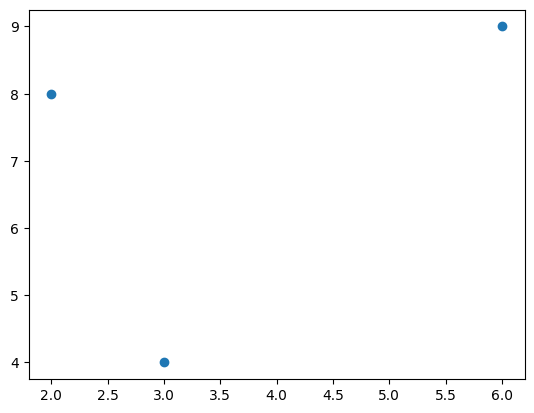

In [73]:
plt.scatter(df['age'], df['count'])

In [74]:
meanOfEachFeature = np.mean(df.T, axis = 1) # df.T means transpose metrix of main matrix

In [75]:
print(meanOfEachFeature)

age      3.666667
count    7.000000
dtype: float64


In [76]:
df

,age,count
0,3,4
1,2,8
2,6,9


In [77]:
scale_Data = df - meanOfEachFeature

In [78]:
scale_Data

,age,count
0,-0.666667,-3.0
1,-1.666667,1.0
2,2.333333,2.0


In [79]:
covariance_matrix = np.cov(scale_Data.T)

In [80]:
covariance_matrix

array([[4.33333333, 2.5       ],
       [2.5       , 7.        ]])

In [81]:
eigenvalue, eigenVector = eig(covariance_matrix)
eigenvalue

array([2.83333333, 8.5       ])

In [82]:
eigenVector

array([[-0.85749293, -0.51449576],
       [ 0.51449576, -0.85749293]])

In [83]:
convert_data = eigenVector.T.dot(scale_Data.T) # here we introduced pca component to the dataset
print(convert_data.T) #here first column represent first principal component

[[-9.71825316e-01  2.91547595e+00]
 [ 1.94365063e+00  1.11022302e-16]
 [-9.71825316e-01 -2.91547595e+00]]


#now we do that using library

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [85]:
pca.fit_transform(data) # here second column represent first principal component

array([[ 2.91547595e+00, -9.71825316e-01],
       [-7.37588530e-16,  1.94365063e+00],
       [-2.91547595e+00, -9.71825316e-01]])

In [86]:
pca.explained_variance_ratio_

array([0.75, 0.25])

In [87]:
#now if we want to see our new data after reducing feature
newDF = pd.DataFrame(data = pca.fit_transform(data), columns=['PC1', 'PC2'])
newDF

,PC1,PC2
0,2.915476e+00,-0.971825
1,-7.375885e-16,1.943651
2,-2.915476e+00,-0.971825


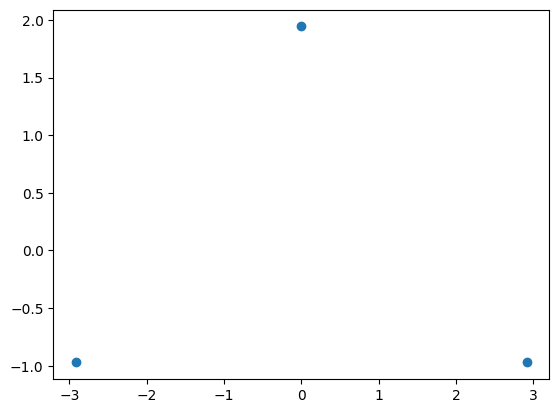

In [88]:
plt.scatter(newDF['PC1'], newDF['PC2'])

In [89]:
#if we want to go back on my main data the 
pca.inverse_transform(pca.fit_transform(data))

array([[3., 4.],
       [2., 8.],
       [6., 9.]])

#Now we apply it with a real time application

In [90]:
from sklearn.datasets import load_breast_cancer

In [91]:
targetData = load_breast_cancer()

In [92]:
targetData.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [93]:
targetData['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [94]:
print(targetData.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [95]:
target_data_frame = pd.DataFrame(targetData['data'], columns= targetData.feature_names)

In [96]:
target_data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [97]:
target_data_frame.count()

mean radius                569
mean texture               569
mean perimeter             569
mean area                  569
mean smoothness            569
mean compactness           569
mean concavity             569
mean concave points        569
mean symmetry              569
mean fractal dimension     569
radius error               569
texture error              569
perimeter error            569
area error                 569
smoothness error           569
compactness error          569
concavity error            569
concave points error       569
symmetry error             569
fractal dimension error    569
worst radius               569
worst texture              569
worst perimeter            569
worst area                 569
worst smoothness           569
worst compactness          569
worst concavity            569
worst concave points       569
worst symmetry             569
worst fractal dimension    569
dtype: int64

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
scale = StandardScaler()

In [100]:
scale.fit(target_data_frame)

StandardScaler()

In [101]:
scaled_data_through_library = scale.transform(target_data_frame)

In [102]:
pca_for_breast_cancer_data = PCA(n_components=2)

In [103]:
pca.fit(scaled_data_through_library)

PCA(n_components=2)

In [104]:
converted_of_x_part_of_data_through_pca = pca.transform(scaled_data_through_library)

In [105]:
scaled_data_through_library.shape

(569, 30)

In [106]:
converted_of_x_part_of_data_through_pca.shape

(569, 2)

Text(0, 0.5, 'Second PCA')

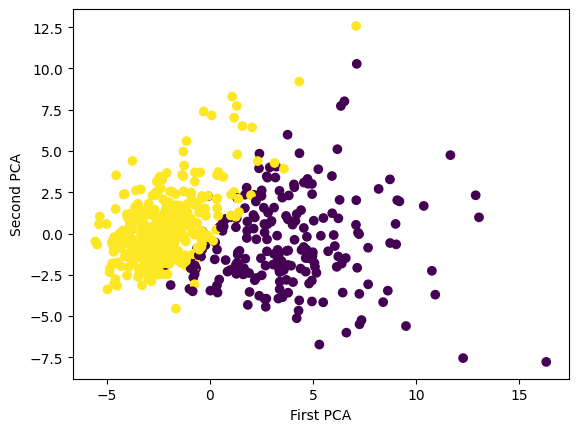

In [107]:
plt.scatter(converted_of_x_part_of_data_through_pca[:, 0], converted_of_x_part_of_data_through_pca[:, 1], c = targetData['target'])
plt.xlabel('First PCA')
plt.ylabel('Second PCA')

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [109]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(converted_of_x_part_of_data_through_pca, targetData['target'], test_size=0.2, random_state=42)

In [110]:
# Create and train a logistic regression model
model = LogisticRegression()

In [111]:
model.fit(X_train, y_train)

LogisticRegression()

In [112]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [113]:
from sklearn.metrics import classification_report, confusion_matrix

In [114]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print('Total Model Report:')
print(classification_report(y_test, y_pred))
print('The confusion metrix is:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9912280701754386
Total Model Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114

The confusion metrix is:
[[42  1]
 [ 0 71]]
